<a href="https://colab.research.google.com/github/PhoebeLu1011/1132code/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [2]:
import pandas as pd
# read data and put it in a dataframe
# 在 google 工作表載入 gsheets;
gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1W8M_DmUTvav6yeYFs_1e7gdO5DX-d55vePejUNkAEJw/edit?usp=sharing').sheet1

In [3]:
dicts = gc.open_by_url('https://docs.google.com/spreadsheets/d/1W8M_DmUTvav6yeYFs_1e7gdO5DX-d55vePejUNkAEJw/edit?usp=sharing').get_worksheet(0)
dicts = dicts.get_all_records()
dicts = pd.DataFrame(dicts)

In [4]:
# 讀取所有數據
rows = gsheets.get_all_records()

df = pd.DataFrame(rows)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

In [6]:
df = df.rename(columns={
    '學生編號': 'Student_ID',
    '睡眠時間_每日(小時)': 'Sleep_Hours',
    '社群媒體使用_每日(小時)': 'Social_Media_Hours',
    '運動頻率_每週(次)': 'Exercise_per_Week',
    '讀書時間_每日(小時)': 'Study_Hours',
    '平均成績': 'Average_Grade'
})

In [7]:
df

,學生姓名,Sleep_Hours,Social_Media_Hours,Exercise_per_Week,Study_Hours,Average_Grade
0,王小明,7.996714,3.324084,2,2.262608,66.027637
1,劉怡君,7.361736,2.614918,4,4.372006,90.258300
2,楊大強,8.147689,2.323078,4,2.480558,78.669094
3,王小華,9.023030,3.611676,2,1.567408,77.094969
4,趙大強,7.265847,4.031000,2,1.205058,66.244382
5,趙思涵,7.265863,3.931280,3,2.394881,72.651517
6,劉大強,9.079213,2.160782,5,0.505038,65.127708
7,周佳怡,8.267435,2.690788,5,1.199807,70.088365
8,陳大強,7.030526,3.331263,3,4.043068,62.908776
9,趙小華,8.042560,3.975545,2,3.823264,90.891441


In [16]:
#資料標準化
features = ['Sleep_Hours', 'Social_Media_Hours', 'Exercise_per_Week', 'Study_Hours', 'Average_Grade']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
features

['Sleep_Hours',
 'Social_Media_Hours',
 'Exercise_per_Week',
 'Study_Hours',
 'Average_Grade']

In [18]:
#KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

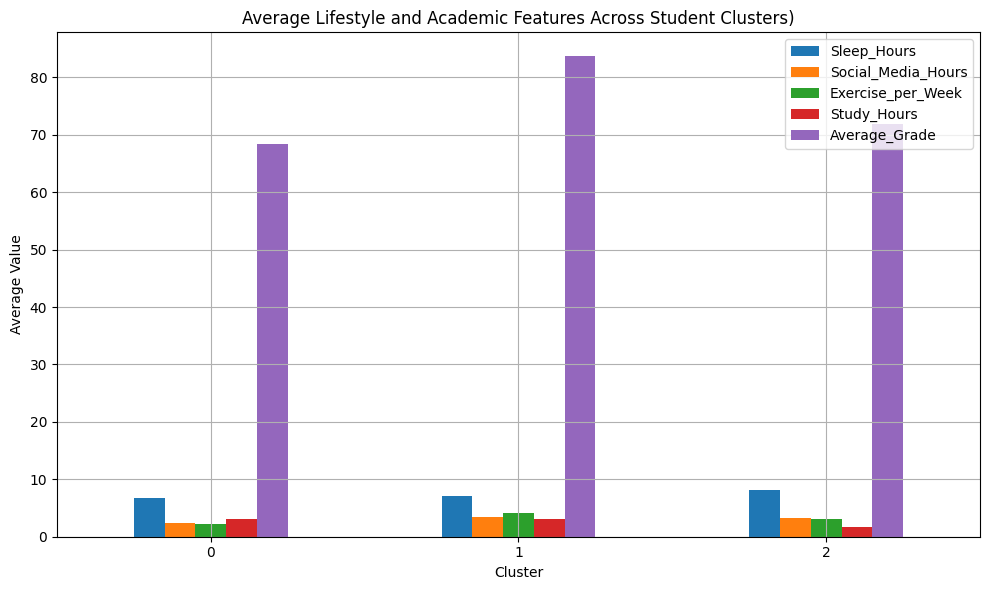

In [20]:
#Bar chart
group_means = df.groupby('Cluster')[features].mean()
group_means.plot(kind='bar', figsize=(10,6))
plt.title('Average Lifestyle and Academic Features Across Student Clusters)')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

Cluster 0\
睡眠時間：偏少（7 小時）

社群媒體：使用最少（2 小時）

運動頻率：最高（3.5 次/週）

讀書時間：最多（3 小時/天）

成績：最低（68 分）

分析：\
可看出雖然這群學生生活規律、運動多、社群媒體使用少，讀書時間也不少，但可能因為學習方法錯誤或壓力因素導致成績不理想。

Cluster 1\
睡眠時間：適中（7.5 小時）

社群媒體：使用最多（3.5 小時）

運動頻率：中等（3 次/週）

讀書時間：中等（2.5 小時）

成績：最高（84 分）

分析：\
這群學生有良好的生活平衡，雖然使用社群媒體的時間最多，但可能因為有良好的時間管理能力，所以整體表現仍最佳。

Cluster 2\
睡眠時間：最多（8 小時）

社群媒體：中等（2.5 小時）

運動與讀書時間：都偏少（2.5 與 2 小時）

成績：中等（76 分）

分析：\
這群學生睡得最多，但運動與讀書時間都偏少，成績介於中間。

In [21]:
group_means = df.groupby('Cluster')[features].mean()
print(group_means)


         Sleep_Hours  Social_Media_Hours  Exercise_per_Week  Study_Hours  \
Cluster                                                                    
0           6.759743            2.446965           2.166667     3.004067   
1           7.014878            3.428116           4.062500     3.039648   
2           8.113305            3.257098           3.000000     1.745310   

         Average_Grade  
Cluster                 
0            68.316049  
1            83.647260  
2            71.945850  


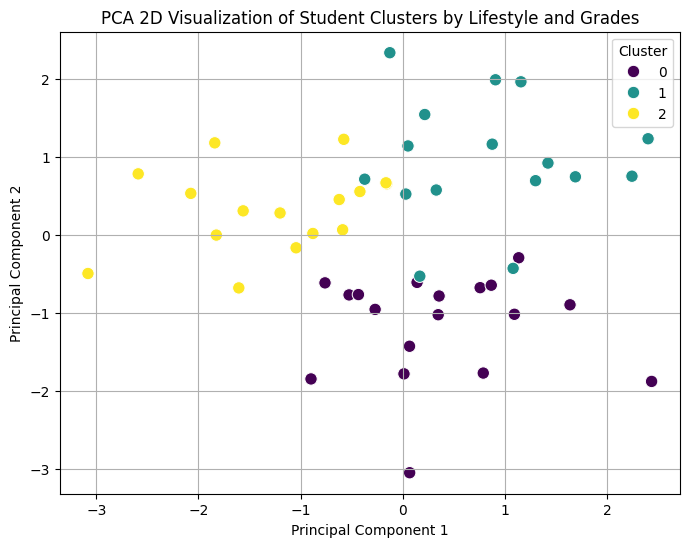

In [22]:
#PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'], palette='viridis', s=80)
plt.title('PCA 2D Visualization of Student Clusters by Lifestyle and Grades')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

●Cluster 0（深紫色）

1. 分布位置 : 左下

2. 在第一軸和第二軸上的數值偏低

3. 解釋：\
這群學生可能整體能力較弱，需要補救教學或其他學習資源

●Cluster 1（綠藍色）

1. 分布位置 : 右上

2. 在第一軸與第二軸數值皆偏高

3. 解釋：\
這群學生在兩個維度上都有良好的表現，可以給予更進階的學習資源或具挑戰性的任務。

●Cluster 2（黃色）

1. 分布位置 : 中間偏左上

2. 第一軸較低，第二軸數值偏高

3. 這群學生可能偏科，可以依照擅長的繼續專精


In [23]:
#PCA 組成
pca_components = pd.DataFrame(pca.components_, columns=features, index=['PCA1', 'PCA2'])
print(pca_components)

      Sleep_Hours  Social_Media_Hours  Exercise_per_Week  Study_Hours  \
PCA1    -0.657747            0.045632           0.016518     0.681991   
PCA2     0.284170            0.724024           0.170675    -0.057582   

      Average_Grade  
PCA1       0.316073  
PCA2       0.602155  
